## **GSR**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

gsr=pd.read_csv('36_GSR.csv')
gsr.head()

UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.676547e+09    1         NaN  2023-02-16 17:07:50.031047           NaN   
1  1.676547e+09    2         NaN  2023-02-16 17:07:50.037120       55654.0   
2  1.676547e+09    3         NaN  2023-02-16 17:07:50.044933       55655.0   
3  1.676547e+09    4         NaN  2023-02-16 17:07:50.052745       55656.0   
4  1.676547e+09    5         NaN  2023-02-16 17:07:50.060558       55657.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0            NaN            NaN                   NaN             NaN   
1      6238301.0    434796.8750          1.676547e+12          2652.0   
2      6238557.0    434804.6875          1.676547e+12          2640.0   
3      6238813.0    434812.5000          1.676547e+12          2651.0   
4      6239069.0    434820.3125          1.676547e+12          2624.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
0             NaN      NaN                 NaN                  NaN   
1     3862.400000  19342.0           86.081081            11.616954   
2     3844.923077  19341.0           86.118927            11.611849   
3     3860.943590  19341.0           86.118927            11.611849   
4     3821.620513  19343.0           86.043268            11.622060   

   Packet reception rate RAW  
0                        NaN  
1                       90.0  
2                       90.0  
3                       90.0  
4                       90.0

In [2]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  68578
Timestamp                        0
SampleNumber                     4
Timestamp RAW                    4
Timestamp CAL                    4
System Timestamp CAL             4
VSenseBatt RAW                   4
VSenseBatt CAL                   4
GSR RAW                          4
GSR Resistance CAL               4
GSR Conductance CAL              4
Packet reception rate RAW        4
dtype: int64

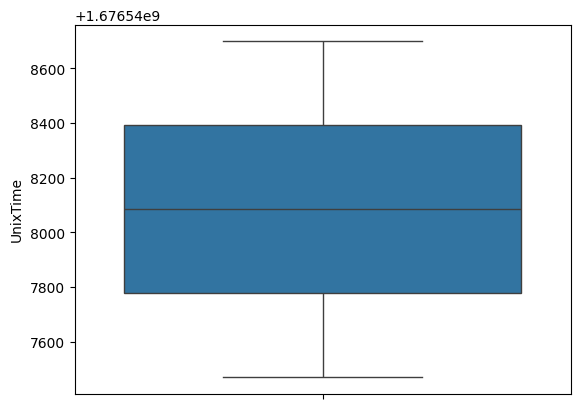

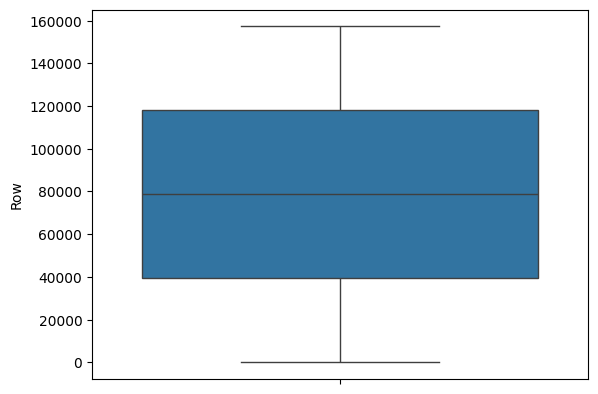

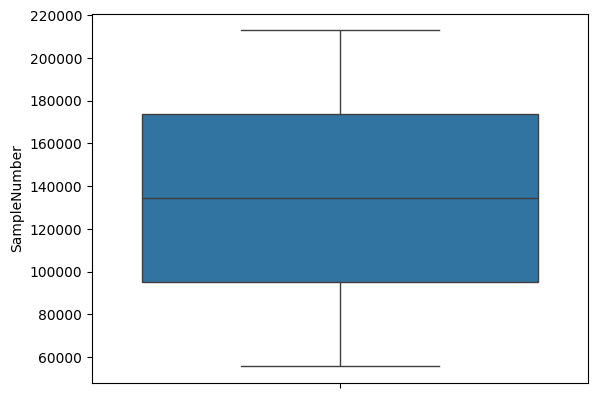

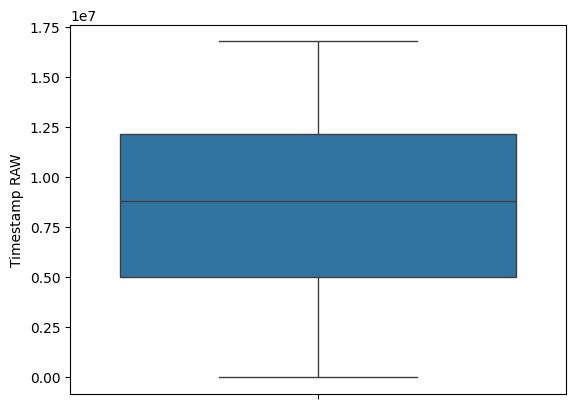

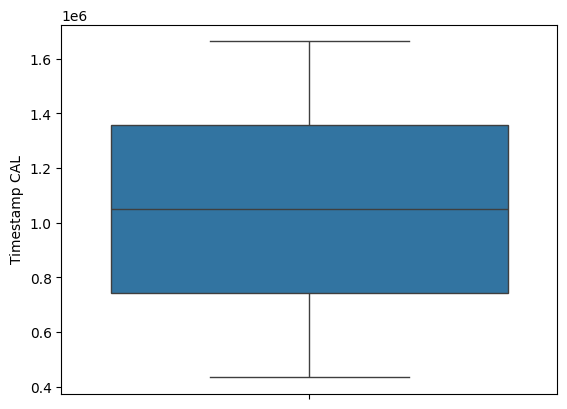

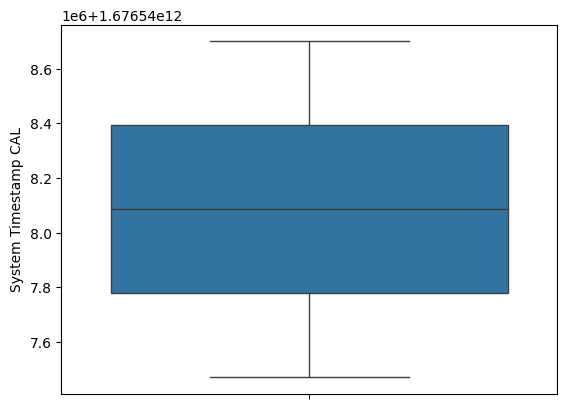

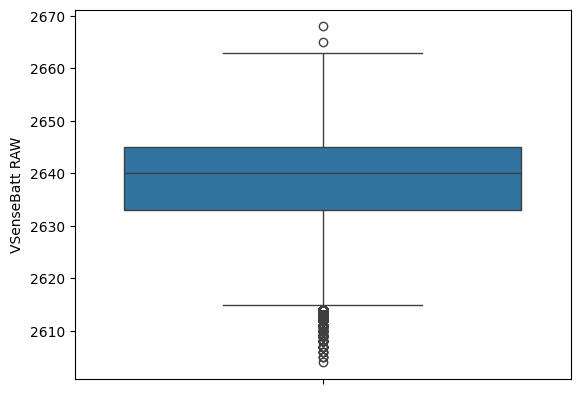

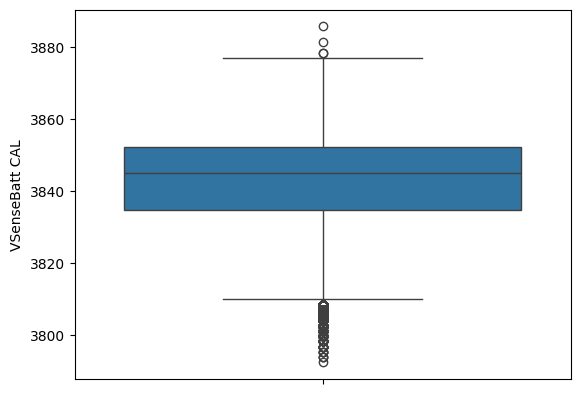

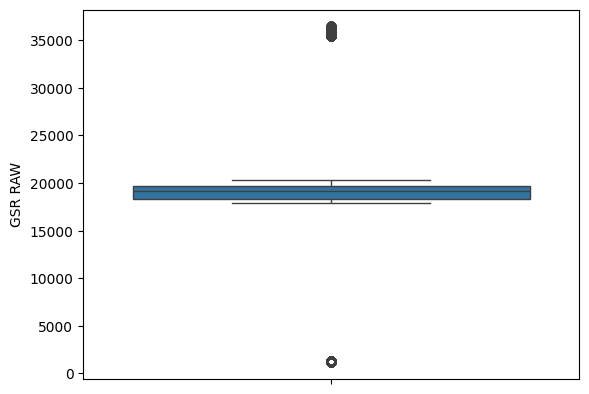

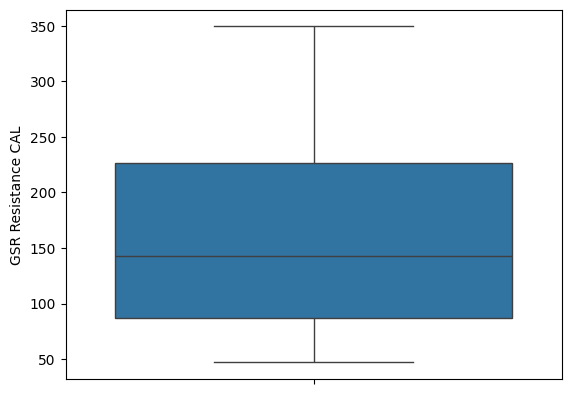

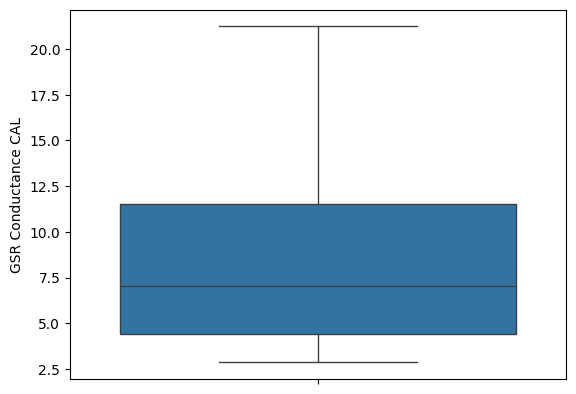

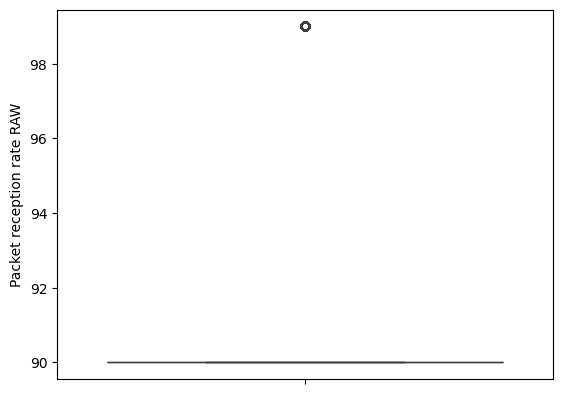

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
gsr_ol=gsr.select_dtypes(include=['float64','int64']).columns
for col in gsr_ol:
    
   sns.boxplot(data=gsr[col])
   plt.xticks(rotation=45)
   plt.show()

In [4]:
print(gsr.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW']


In [5]:
gsr=gsr.dropna(subset=['SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW'])

In [6]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  68574
Timestamp                        0
SampleNumber                     0
Timestamp RAW                    0
Timestamp CAL                    0
System Timestamp CAL             0
VSenseBatt RAW                   0
VSenseBatt CAL                   0
GSR RAW                          0
GSR Resistance CAL               0
GSR Conductance CAL              0
Packet reception rate RAW        0
dtype: int64

In [7]:
for col in gsr.select_dtypes(include=['object']).columns:
    gsr[col]=gsr[col].fillna(gsr[col].mode()[0])

In [8]:
gsr.isnull().sum()

UnixTime                     0
Row                          0
QuestionKey                  0
Timestamp                    0
SampleNumber                 0
Timestamp RAW                0
Timestamp CAL                0
System Timestamp CAL         0
VSenseBatt RAW               0
VSenseBatt CAL               0
GSR RAW                      0
GSR Resistance CAL           0
GSR Conductance CAL          0
Packet reception rate RAW    0
dtype: int64

In [9]:
gsr['Timestamp']=pd.to_datetime(gsr['Timestamp'], errors='coerce')

In [10]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.676547e+09    2      1Item7 2023-02-16 17:07:50.037120       55654.0   
2  1.676547e+09    3      1Item7 2023-02-16 17:07:50.044933       55655.0   
3  1.676547e+09    4      1Item7 2023-02-16 17:07:50.052745       55656.0   
4  1.676547e+09    5      1Item7 2023-02-16 17:07:50.060558       55657.0   
5  1.676547e+09    6      1Item7 2023-02-16 17:07:50.068370       55658.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1      6238301.0    434796.8750          1.676547e+12          2652.0   
2      6238557.0    434804.6875          1.676547e+12          2640.0   
3      6238813.0    434812.5000          1.676547e+12          2651.0   
4      6239069.0    434820.3125          1.676547e+12          2624.0   
5      6239325.0    434828.1250          1.676547e+12          2653.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     3862.400000  19342.0           86.081081            11.616954   
2     3844.923077  19341.0           86.118927            11.611849   
3     3860.943590  19341.0           86.118927            11.611849   
4     3821.620513  19343.0           86.043268            11.622060   
5     3863.856410  19341.0           86.118927            11.611849   

   Packet reception rate RAW  
1                       90.0  
2                       90.0  
3                       90.0  
4                       90.0  
5                       90.0

In [11]:
gsr.dtypes

UnixTime                            float64
Row                                   int64
QuestionKey                          object
Timestamp                    datetime64[ns]
SampleNumber                        float64
Timestamp RAW                       float64
Timestamp CAL                       float64
System Timestamp CAL                float64
VSenseBatt RAW                      float64
VSenseBatt CAL                      float64
GSR RAW                             float64
GSR Resistance CAL                  float64
GSR Conductance CAL                 float64
Packet reception rate RAW           float64
dtype: object

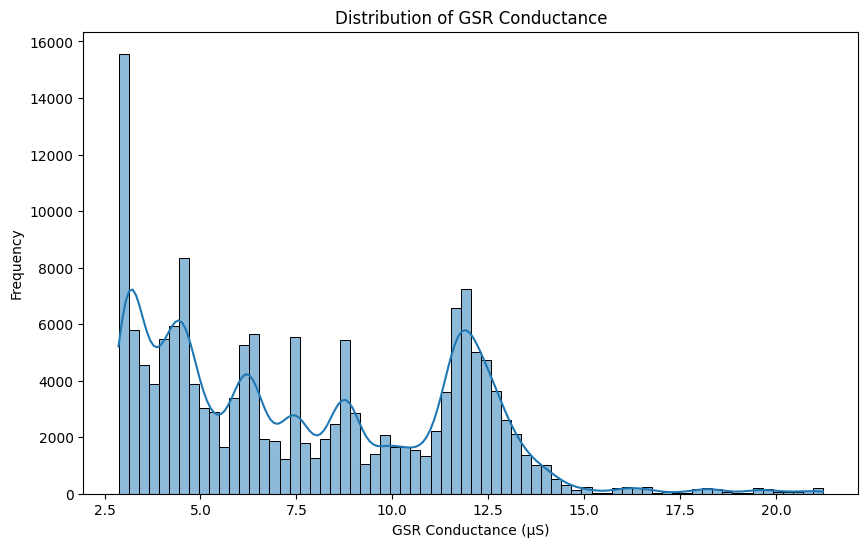

In [12]:
# 1. GSR Conductance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(gsr['GSR Conductance CAL'], kde=True)
plt.title('Distribution of GSR Conductance')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Frequency')
# plt.savefig('gsr_conductance_distribution.png')
plt.show()

The plot shows a multi-modal distribution (at least two prominent peaks around 2.7 $\mu$S and 11.8 $\mu$S), suggesting that GSR conductance values are not uniformly distributed and might have distinct clusters or groups.

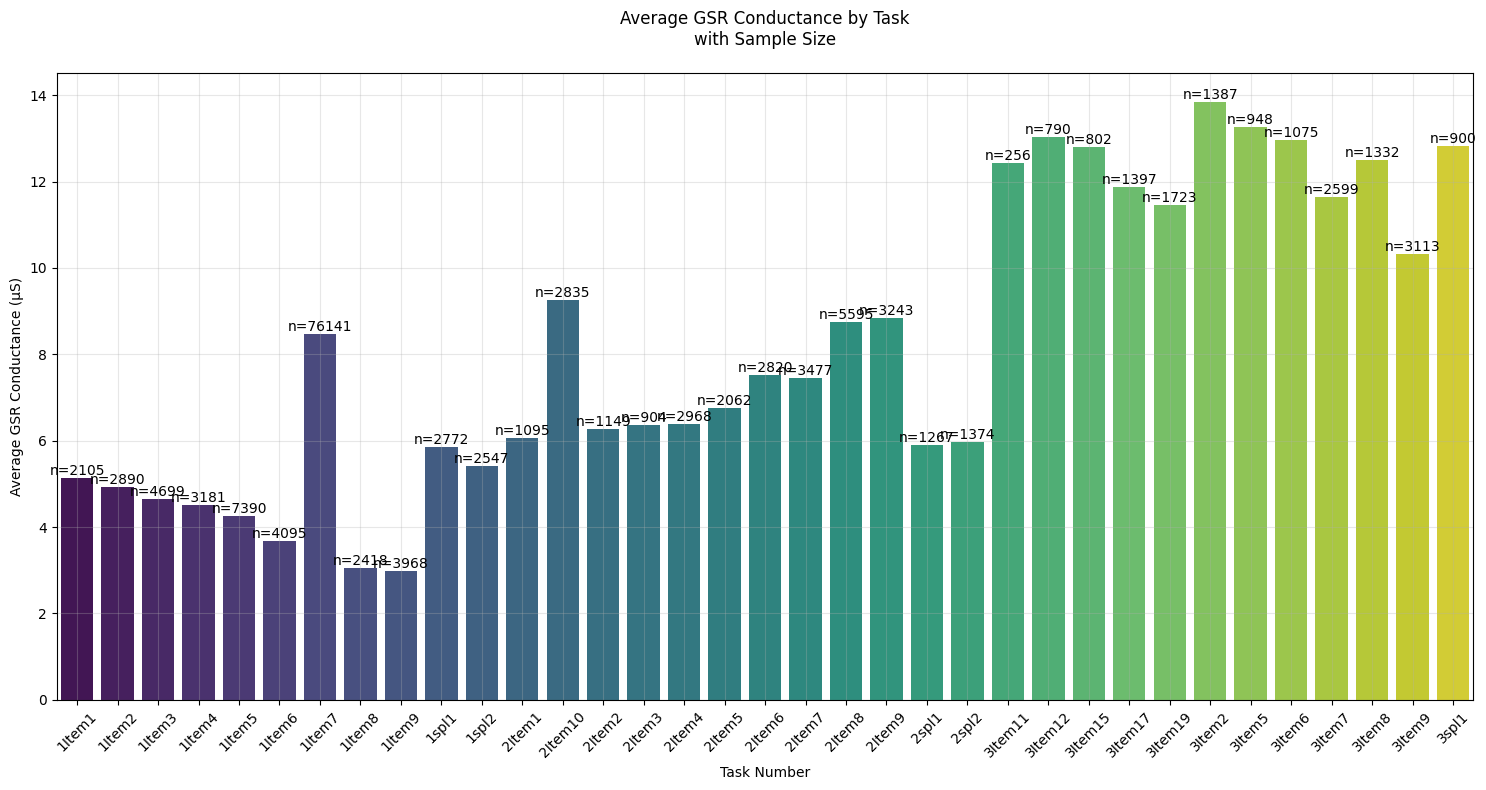

In [13]:
# Grouping GSR data by QuestionKey and calculating stats
task_gsr = gsr.groupby('QuestionKey')['GSR Conductance CAL'].agg(['mean', 'count']).reset_index()

# Set up the plot
plt.figure(figsize=(15, 8))

# Create a barplot of the mean GSR for each task
# ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, palette='viridis')
ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, hue='QuestionKey', palette='viridis', legend=False)

# Add text labels on each bar showing the sample size
for i, row in task_gsr.iterrows():
    plt.text(i, row['mean'], f'n={int(row["count"])}', 
             ha='center', va='bottom')

# Title and axis labels
plt.title('Average GSR Conductance by Task\nwith Sample Size', pad=20)
plt.xlabel('Task Number')
plt.ylabel('Average GSR Conductance (µS)')

# Improve readability: rotate x-axis labels
plt.xticks(rotation=45)

# Add a light grid
plt.grid(True, alpha=0.3)

# Adjust layout to fit elements nicely
plt.tight_layout()

# Save the figure as a PNG with high resolution
# plt.savefig('gsr_by_task_no_errorbar.png', bbox_inches='tight', dpi=300)

# Close the plot (good practice when generating multiple plots)
plt.show()


The bar chart shows **average GSR conductance varies across different "Test Numbers"**, with values fluctuating between approximately 12 and 14 $\mu$S. Crucially, each bar includes its **sample size**, highlighting that some averages are based on very large samples (more reliable) while others are based on smaller ones. There's no clear linear trend, suggesting distinct physiological responses or conditions for each test.

In [14]:
gsr.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'SampleNumber',
 'Timestamp RAW',
 'Timestamp CAL',
 'System Timestamp CAL',
 'VSenseBatt RAW',
 'VSenseBatt CAL',
 'GSR RAW',
 'GSR Resistance CAL',
 'GSR Conductance CAL',
 'Packet reception rate RAW']

In [16]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.676547e+09    2      1Item7 2023-02-16 17:07:50.037120       55654.0   
2  1.676547e+09    3      1Item7 2023-02-16 17:07:50.044933       55655.0   
3  1.676547e+09    4      1Item7 2023-02-16 17:07:50.052745       55656.0   
4  1.676547e+09    5      1Item7 2023-02-16 17:07:50.060558       55657.0   
5  1.676547e+09    6      1Item7 2023-02-16 17:07:50.068370       55658.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1      6238301.0    434796.8750          1.676547e+12          2652.0   
2      6238557.0    434804.6875          1.676547e+12          2640.0   
3      6238813.0    434812.5000          1.676547e+12          2651.0   
4      6239069.0    434820.3125          1.676547e+12          2624.0   
5      6239325.0    434828.1250          1.676547e+12          2653.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     3862.400000  19342.0           86.081081            11.616954   
2     3844.923077  19341.0           86.118927            11.611849   
3     3860.943590  19341.0           86.118927            11.611849   
4     3821.620513  19343.0           86.043268            11.622060   
5     3863.856410  19341.0           86.118927            11.611849   

   Packet reception rate RAW  
1                       90.0  
2                       90.0  
3                       90.0  
4                       90.0  
5                       90.0

## **PSY**

In [17]:
import pandas as pd
psy=pd.read_csv('36_PSY.csv')
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1   1spl2         1           spl2        nomatch       Easy  CORRECT   
2  1Item1         1          Item1          match       Easy  CORRECT   
3  1Item2         1          Item2          match       Easy  CORRECT   
4  1Item3         1          Item3          match       Easy  CORRECT   

   ResponseTime  routineStart          routineStamp    routineEnd  \
0     21.658827  1.676548e+09  16/02/2023, 17:11:06  1.676548e+09   
1     19.895448  1.676548e+09  16/02/2023, 17:11:27  1.676548e+09   
2     16.446396  1.676548e+09  16/02/2023, 17:11:47  1.676548e+09   
3     22.580389  1.676548e+09  16/02/2023, 17:12:04  1.676548e+09   
4     36.709894  1.676548e+09  16/02/2023, 17:12:26  1.676548e+09   

   Cat2FeedbackTime  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [18]:
psy.dtypes

Key                  object
Category              int64
QuestionNumber       object
matchOrnomatch       object
Difficulty           object
verdict              object
ResponseTime        float64
routineStart        float64
routineStamp         object
routineEnd          float64
Cat2FeedbackTime    float64
dtype: object

In [19]:
psy.isnull().sum()

Key                  0
Category             0
QuestionNumber       0
matchOrnomatch       2
Difficulty           2
verdict              2
ResponseTime         0
routineStart         0
routineStamp         0
routineEnd           0
Cat2FeedbackTime    25
dtype: int64

In [20]:
psy.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [21]:
psy['routineStart'] = pd.to_datetime(psy['routineStart'], errors='coerce')
psy['routineEnd'] = pd.to_datetime(psy['routineEnd'], errors='coerce')

In [22]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp                object
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [23]:
psy['routineStamp'] = pd.to_datetime(psy['routineStamp'], dayfirst=True)

In [24]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp        datetime64[ns]
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [25]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1   1spl2         1           spl2        nomatch       Easy  CORRECT   
2  1Item1         1          Item1          match       Easy  CORRECT   
3  1Item2         1          Item2          match       Easy  CORRECT   
4  1Item3         1          Item3          match       Easy  CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0     21.658827 1970-01-01 00:00:01.676547666 2023-02-16 17:11:06   
1     19.895448 1970-01-01 00:00:01.676547687 2023-02-16 17:11:27   
2     16.446396 1970-01-01 00:00:01.676547707 2023-02-16 17:11:47   
3     22.580389 1970-01-01 00:00:01.676547724 2023-02-16 17:12:04   
4     36.709894 1970-01-01 00:00:01.676547746 2023-02-16 17:12:26   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.676547687               NaN  
1 1970-01-01 00:00:01.676547707               NaN  
2 1970-01-01 00:00:01.676547724               NaN  
3 1970-01-01 00:00:01.676547746               NaN  
4 1970-01-01 00:00:01.676547783               NaN

In [26]:
psy['ResponseTime'] = psy['ResponseTime'].round(2)

In [27]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1   1spl2         1           spl2        nomatch       Easy  CORRECT   
2  1Item1         1          Item1          match       Easy  CORRECT   
3  1Item2         1          Item2          match       Easy  CORRECT   
4  1Item3         1          Item3          match       Easy  CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0         21.66 1970-01-01 00:00:01.676547666 2023-02-16 17:11:06   
1         19.90 1970-01-01 00:00:01.676547687 2023-02-16 17:11:27   
2         16.45 1970-01-01 00:00:01.676547707 2023-02-16 17:11:47   
3         22.58 1970-01-01 00:00:01.676547724 2023-02-16 17:12:04   
4         36.71 1970-01-01 00:00:01.676547746 2023-02-16 17:12:26   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.676547687               NaN  
1 1970-01-01 00:00:01.676547707               NaN  
2 1970-01-01 00:00:01.676547724               NaN  
3 1970-01-01 00:00:01.676547746               NaN  
4 1970-01-01 00:00:01.676547783               NaN

In [28]:
psy.shape

(35, 11)

In [29]:
if 'Cat2FeedbackTime' in psy.columns:
    psy['Cat2FeedbackTime'] = psy['Cat2FeedbackTime'].round(2)

In [30]:
import numpy as np
numeric_cols = psy.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = psy[col].quantile(0.25)
    Q3 = psy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((psy[col] < lower) | (psy[col] > upper)).any():
        outlier_cols.append(col)

In [31]:
for col in psy.columns:
    if psy[col].isnull().any():
        if col in outlier_cols:
            psy[col] = psy[col].fillna(psy[col].median())
        elif psy[col].dtype in ['float64', 'int64']:
            psy[col] = psy[col].fillna(psy[col].mean())
        else:
            psy[col] = psy[col].fillna(psy[col].mode()[0])

In [32]:
psy.isnull().sum()

Key                 0
Category            0
QuestionNumber      0
matchOrnomatch      0
Difficulty          0
verdict             0
ResponseTime        0
routineStart        0
routineStamp        0
routineEnd          0
Cat2FeedbackTime    0
dtype: int64

In [33]:
psy.columns.tolist()

['Key',
 'Category',
 'QuestionNumber',
 'matchOrnomatch',
 'Difficulty',
 'verdict',
 'ResponseTime',
 'routineStart',
 'routineStamp',
 'routineEnd',
 'Cat2FeedbackTime']

In [34]:
psy_cr=psy.select_dtypes(include=['float64','int64'])
psy_corr=psy_cr.corr().round(2)
psy_corr

Category  ResponseTime  Cat2FeedbackTime
Category              1.00         -0.61             -0.01
ResponseTime         -0.61          1.00              0.11
Cat2FeedbackTime     -0.01          0.11              1.00

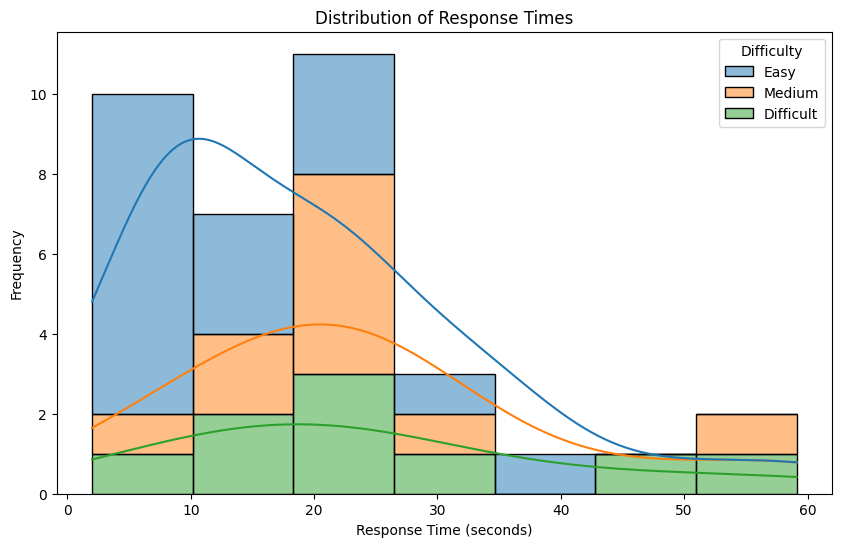

In [35]:
# 1. Response Time Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# sns.histplot(psy['ResponseTime'], kde=True,)
sns.histplot(data=psy, x='ResponseTime', hue='Difficulty', kde=True, multiple='stack')
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
# plt.savefig('response_time_distribution.png')
plt.show()

The distribution of response times clearly varies by task difficulty. Easy tasks were answered quickly and consistently, while difficult tasks resulted in slower and more variable response times. Medium tasks fell in between. This pattern highlights that task difficulty meaningfully influences the cognitive effort or processing time required during mental rotation tasks.

In [36]:
# Assuming both have a common task identifier — looks like 'QuestionNumber' from PSY vs 'QuestionKey' from GSR
merged_df = pd.merge(gsr, psy, left_on='QuestionKey', right_on='QuestionNumber', how='inner')

print(merged_df.columns)  # Verify merged columns


Index(['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber',
       'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL',
       'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL',
       'GSR Conductance CAL', 'Packet reception rate RAW', 'Key', 'Category',
       'QuestionNumber', 'matchOrnomatch', 'Difficulty', 'verdict',
       'ResponseTime', 'routineStart', 'routineStamp', 'routineEnd',
       'Cat2FeedbackTime'],
      dtype='object')


In [37]:
print(gsr['QuestionKey'].unique()[:10])
print(psy['QuestionNumber'].unique()[:10])


['1Item7' '1spl1' '1spl2' '1Item1' '1Item2' '1Item3' '1Item4' '1Item5'
 '1Item6' '1Item8']
['spl1' 'spl2' 'Item1' 'Item2' 'Item3' 'Item4' 'Item5' 'Item6' 'Item7'
 'Item8']


In [38]:
# Strip the leading digit from GSR QuestionKey
gsr['CleanKey'] = gsr['QuestionKey'].str.replace(r'^\d+', '', regex=True)

# Verify cleaned keys
print(gsr['CleanKey'].unique()[:10])

['Item7' 'spl1' 'spl2' 'Item1' 'Item2' 'Item3' 'Item4' 'Item5' 'Item6'
 'Item8']


In [39]:
# Now merge on cleaned key
merged_df = pd.merge(gsr, psy, left_on='CleanKey', right_on='QuestionNumber', how='inner')

# Check the result
print(f"Merged data shape: {merged_df.shape}")
print(merged_df.head())

Merged data shape: (437472, 26)
       UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.676547e+09    2      1Item7 2023-02-16 17:07:50.037120       55654.0   
1  1.676547e+09    2      1Item7 2023-02-16 17:07:50.037120       55654.0   
2  1.676547e+09    2      1Item7 2023-02-16 17:07:50.037120       55654.0   
3  1.676547e+09    3      1Item7 2023-02-16 17:07:50.044933       55655.0   
4  1.676547e+09    3      1Item7 2023-02-16 17:07:50.044933       55655.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0      6238301.0    434796.8750          1.676547e+12          2652.0   
1      6238301.0    434796.8750          1.676547e+12          2652.0   
2      6238301.0    434796.8750          1.676547e+12          2652.0   
3      6238557.0    434804.6875          1.676547e+12          2640.0   
4      6238557.0    434804.6875          1.676547e+12          2640.0   

   VSenseBatt CAL  ...  Category  QuestionNumber  matchOrnomatch  

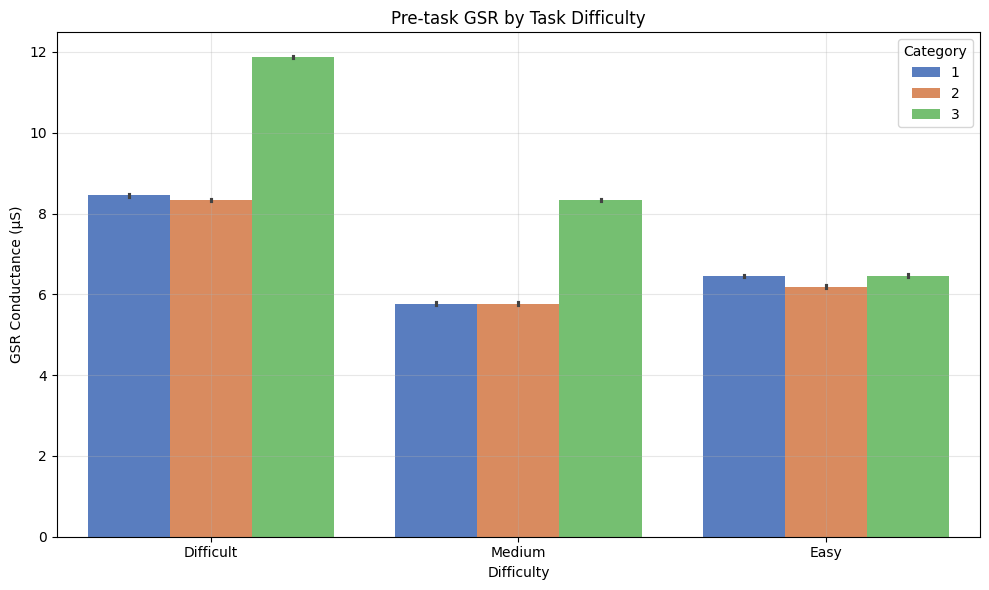

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Difficulty', y='GSR Conductance CAL', data=merged_df, palette='muted',hue='Category')
plt.title('Pre-task GSR by Task Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('GSR Conductance (µS)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


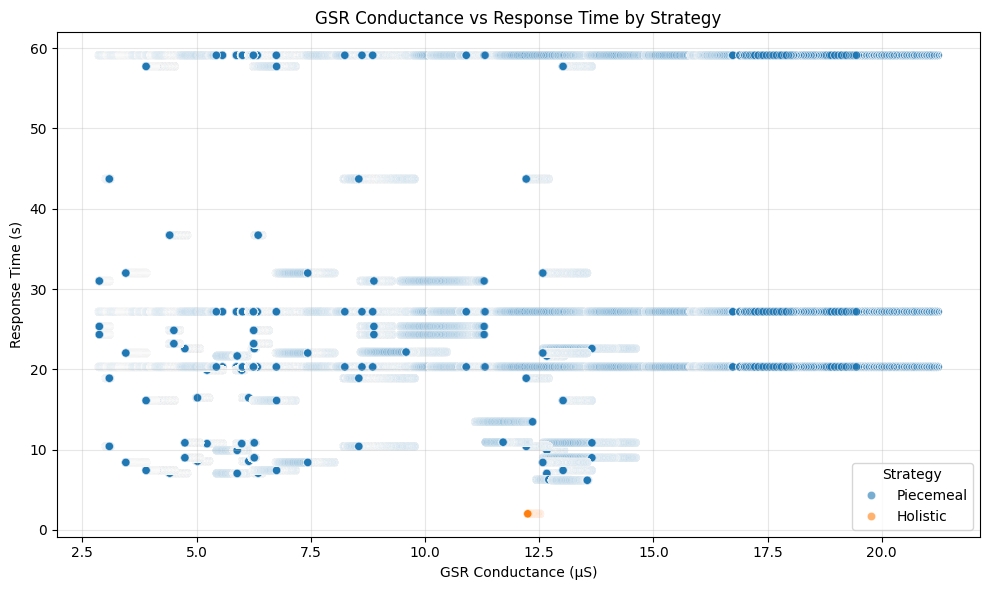

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GSR Conductance CAL', y='ResponseTime', hue='Strategy', data=merged_df, alpha=0.6)
plt.title('GSR Conductance vs Response Time by Strategy')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Response Time (s)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


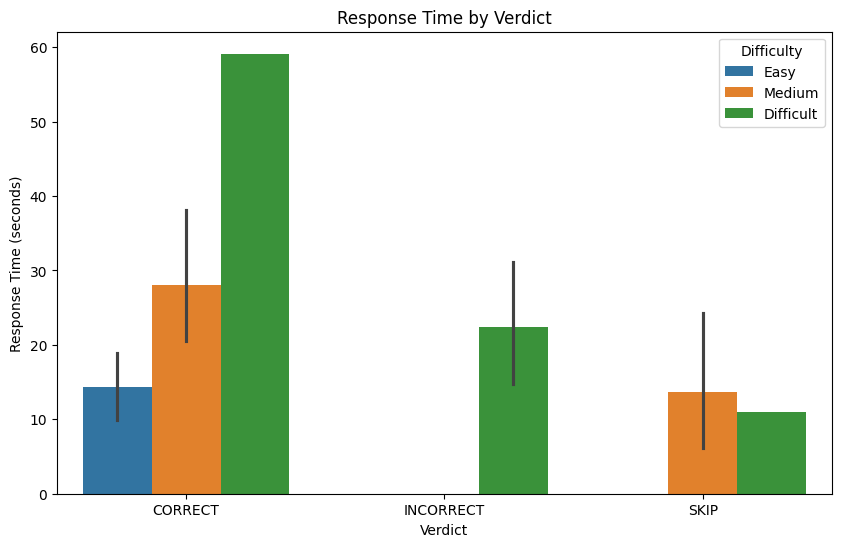

In [44]:
# 3. Response Time by Verdict
plt.figure(figsize=(10, 6))
sns.barplot(x='verdict', y='ResponseTime', data=psy,hue='Difficulty')
plt.title('Response Time by Verdict')
plt.xlabel('Verdict')
plt.ylabel('Response Time (seconds)')
# plt.savefig('response_time_by_verdict.png')
plt.show()

## **TIVA**

In [45]:
tv=pd.read_csv('36_TIVA.csv')
tv.head()

UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.676547e+09    1         NaN  2023-02-16 17:07:50.031047           NaN   
1  1.676547e+09    2         NaN  2023-02-16 17:07:50.075313          -1.0   
2  1.676547e+09    3         NaN  2023-02-16 17:07:52.800571          -1.0   
3  1.676547e+09    4         NaN  2023-02-16 17:07:52.804516          -1.0   
4  1.676547e+09    5         NaN  2023-02-16 17:07:52.810539          -1.0   

     Anger  Contempt   Disgust      Fear       Joy  ...  Nose Wrinkle  \
0      NaN       NaN       NaN       NaN       NaN  ...           NaN   
1  0.05574  0.020317  0.022663  8.791936  0.024039  ...      0.001134   
2      NaN       NaN       NaN       NaN       NaN  ...           NaN   
3      NaN       NaN       NaN       NaN       NaN  ...           NaN   
4      NaN       NaN       NaN       NaN       NaN  ...           NaN   

      Smile     Smirk  Upper Lip Raise  Blink  BlinkRate      Pitch       Yaw  \
0       NaN       NaN              NaN    NaN        NaN        NaN       NaN   
1  0.000508  0.009368         0.001578    0.0       18.0  19.772564  6.923439   
2       NaN       NaN              NaN    NaN        NaN        NaN       NaN   
3       NaN       NaN              NaN    NaN        NaN        NaN       NaN   
4       NaN       NaN              NaN    NaN        NaN        NaN       NaN   

       Roll  Interocular Distance  
0       NaN                   NaN  
1  3.638836            139.450943  
2       NaN                   NaN  
3       NaN                   NaN  
4       NaN                   NaN  

[5 rows x 44 columns]

In [46]:
tv.dtypes

UnixTime                float64
Row                       int64
QuestionKey              object
Timestamp                object
SampleNumber            float64
Anger                   float64
Contempt                float64
Disgust                 float64
Fear                    float64
Joy                     float64
Sadness                 float64
Surprise                float64
Engagement              float64
Valence                 float64
Sentimentality          float64
Confusion               float64
Neutral                 float64
Attention               float64
Brow Furrow             float64
Brow Raise              float64
Cheek Raise             float64
Chin Raise              float64
Dimpler                 float64
Eye Closure             float64
Eye Widen               float64
Inner Brow Raise        float64
Jaw Drop                float64
Lip Corner Depressor    float64
Lip Press               float64
Lip Pucker              float64
Lip Stretch             float64
Lip Suck

In [47]:
tv['Timestamp'] = pd.to_datetime(tv['Timestamp'], errors='coerce')

In [48]:
print(tv.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
12413    False
12414    False
12415    False
12416    False
12417    False
Length: 12418, dtype: bool


In [49]:
 tv.shape

(12418, 44)

In [50]:
tv.isnull().sum()

UnixTime                   0
Row                        0
QuestionKey             5403
Timestamp                  0
SampleNumber               4
Anger                   1068
Contempt                1068
Disgust                 1068
Fear                    1068
Joy                     1068
Sadness                 1068
Surprise                1068
Engagement              1068
Valence                 1068
Sentimentality          1068
Confusion               1068
Neutral                 1068
Attention               1068
Brow Furrow             1068
Brow Raise              1068
Cheek Raise             1068
Chin Raise              1068
Dimpler                 1068
Eye Closure             1068
Eye Widen               1068
Inner Brow Raise        1068
Jaw Drop                1068
Lip Corner Depressor    1068
Lip Press               1068
Lip Pucker              1068
Lip Stretch             1068
Lip Suck                1068
Lid Tighten             1068
Mouth Open              1068
Nose Wrinkle  

In [51]:
# Identify columns with outliers using IQR
numeric_cols = tv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = tv[col].quantile(0.25)
    Q3 = tv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((tv[col] < lower) | (tv[col] > upper)).any():
        print(outlier_cols.append(col))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [52]:
for col in tv.columns:
    if tv[col].isnull().any():
        if col in outlier_cols:
            tv[col] = tv[col].fillna(tv[col].median())
        elif tv[col].dtype in ['float64', 'int64']:
            tv[col] = tv[col].fillna(tv[col].mean())
        else:
            tv[col] = tv[col].fillna(tv[col].mode()[0])

In [53]:
tv.isnull().sum()

UnixTime                0
Row                     0
QuestionKey             0
Timestamp               0
SampleNumber            0
Anger                   0
Contempt                0
Disgust                 0
Fear                    0
Joy                     0
Sadness                 0
Surprise                0
Engagement              0
Valence                 0
Sentimentality          0
Confusion               0
Neutral                 0
Attention               0
Brow Furrow             0
Brow Raise              0
Cheek Raise             0
Chin Raise              0
Dimpler                 0
Eye Closure             0
Eye Widen               0
Inner Brow Raise        0
Jaw Drop                0
Lip Corner Depressor    0
Lip Press               0
Lip Pucker              0
Lip Stretch             0
Lip Suck                0
Lid Tighten             0
Mouth Open              0
Nose Wrinkle            0
Smile                   0
Smirk                   0
Upper Lip Raise         0
Blink       

In [54]:
tv_cr=tv.select_dtypes(include=['float64','int64'])
tv_corr=tv_cr.corr().round(2)
tv_corr

UnixTime   Row  SampleNumber  Anger  Contempt  Disgust  \
UnixTime                  1.00  1.00          1.00  -0.06      0.06     0.05   
Row                       1.00  1.00          1.00  -0.06      0.06     0.05   
SampleNumber              1.00  1.00          1.00  -0.06      0.06     0.05   
Anger                    -0.06 -0.06         -0.06   1.00      0.52     0.02   
Contempt                  0.06  0.06          0.06   0.52      1.00     0.02   
Disgust                   0.05  0.05          0.05   0.02      0.02     1.00   
Fear                     -0.22 -0.22         -0.22   0.40      0.13     0.01   
Joy                       0.11  0.11          0.11   0.00     -0.00     0.42   
Sadness                   0.14  0.14          0.14   0.11      0.08     0.02   
Surprise                 -0.16 -0.16         -0.16   0.28      0.06     0.13   
Engagement               -0.07 -0.07         -0.07   0.24      0.20     0.10   
Valence                  -0.04 -0.04         -0.04  -0.28     -0.24     0.13   
Sentimentality            0.13  0.13          0.13   0.32      0.35     0.02   
Confusion                 0.09  0.09          0.09  -0.01     -0.00     0.32   
Neutral                   0.06  0.06          0.06  -0.39     -0.41    -0.16   
Attention                -0.04 -0.04         -0.04  -0.01      0.01    -0.00   
Brow Furrow               0.09  0.09          0.09  -0.00     -0.00     0.31   
Brow Raise               -0.30 -0.30         -0.30  -0.09     -0.16     0.01   
Cheek Raise               0.12  0.12          0.12   0.03      0.05     0.44   
Chin Raise                0.14  0.14          0.14   0.38      0.51     0.03   
Dimpler                   0.01  0.01          0.01   0.44      0.29     0.00   
Eye Closure               0.01  0.01          0.01  -0.01     -0.01     0.06   
Eye Widen                -0.15 -0.15         -0.15   0.40      0.19     0.00   
Inner Brow Raise          0.06  0.06          0.06   0.29      0.26     0.33   
Jaw Drop                  0.12  0.12          0.12   0.12      0.04     0.09   
Lip Corner Depressor      0.18  0.18          0.18   0.00     -0.02     0.01   
Lip Press                 0.07  0.07          0.07   0.47      0.29     0.02   
Lip Pucker                0.09  0.09          0.09  -0.01     -0.00     0.21   
Lip Stretch              -0.02 -0.02         -0.02   0.69      0.73     0.01   
Lip Suck                  0.08  0.08          0.08   0.51      0.85     0.02   
Lid Tighten               0.08  0.08          0.08   0.01     -0.00     0.66   
Mouth Open                0.06  0.06          0.06   0.12     -0.00     0.28   
Nose Wrinkle              0.08  0.08          0.08  -0.00     -0.00     0.71   
Smile                     0.13  0.13          0.13   0.00      0.00     0.42   
Smirk                     0.14  0.14          0.14   0.47      0.81     0.13   
Upper Lip Raise           0.07  0.07          0.07  -0.00     -0.00     0.86   
Blink                    -0.00 -0.00         -0.00  -0.01     -0.01    -0.00   
BlinkRate                -0.06 -0.06         -0.06   0.13      0.03    -0.03   
Pitch                     0.02  0.02          0.02   0.01      0.07    -0.09   
Yaw                      -0.17 -0.17         -0.17  -0.01     -0.10    -0.07   
Roll                      0.04  0.04          0.04   0.09      0.08    -0.05   
Interocular Distance     -0.55 -0.55         -0.55  -0.03     -0.11    -0.11   

                      Fear   Joy  Sadness  Surprise  ...  Nose Wrinkle  Smile  \
UnixTime             -0.22  0.11     0.14     -0.16  ...          0.08   0.13   
Row                  -0.22  0.11     0.14     -0.16  ...          0.08   0.13   
SampleNumber         -0.22  0.11     0.14     -0.16  ...          0.08   0.13   
Anger                 0.40  0.00     0.11      0.28  ...         -0.00   0.00   
Contempt              0.13 -0.00     0.08      0.06  ...         -0.00   0.00   
Disgust               0.01  0.42     0.02      0.13  ...          0.71   0.42   
Fear          

In [55]:
print(tv.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral', 'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Pitch', 'Yaw', 'Roll', 'Interocular Distance']


In [56]:
tv.head()


UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.676547e+09    1      1Item7 2023-02-16 17:07:50.031047     6197.5029   
1  1.676547e+09    2      1Item7 2023-02-16 17:07:50.075313       -1.0000   
2  1.676547e+09    3      1Item7 2023-02-16 17:07:52.800571       -1.0000   
3  1.676547e+09    4      1Item7 2023-02-16 17:07:52.804516       -1.0000   
4  1.676547e+09    5      1Item7 2023-02-16 17:07:52.810539       -1.0000   

      Anger  Contempt   Disgust      Fear       Joy  ...  Nose Wrinkle  \
0  0.069433  0.048363  0.024124  1.290705  0.024046  ...      0.001379   
1  0.055740  0.020317  0.022663  8.791936  0.024039  ...      0.001134   
2  0.069433  0.048363  0.024124  1.290705  0.024046  ...      0.001379   
3  0.069433  0.048363  0.024124  1.290705  0.024046  ...      0.001379   
4  0.069433  0.048363  0.024124  1.290705  0.024046  ...      0.001379   

      Smile     Smirk  Upper Lip Raise  Blink  BlinkRate      Pitch       Yaw  \
0  0.000533  0.004908         0.000303    0.0        6.0  19.155613  5.102536   
1  0.000508  0.009368         0.001578    0.0       18.0  19.772564  6.923439   
2  0.000533  0.004908         0.000303    0.0        6.0  19.155613  5.102536   
3  0.000533  0.004908         0.000303    0.0        6.0  19.155613  5.102536   
4  0.000533  0.004908         0.000303    0.0        6.0  19.155613  5.102536   

       Roll  Interocular Distance  
0  1.453458            138.542336  
1  3.638836            139.450943  
2  1.453458            138.542336  
3  1.453458            138.542336  
4  1.453458            138.542336  

[5 rows x 44 columns]

In [57]:
tv.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12413    False
12414    False
12415    False
12416    False
12417    False
Length: 12418, dtype: bool

Generating emotion distributions...


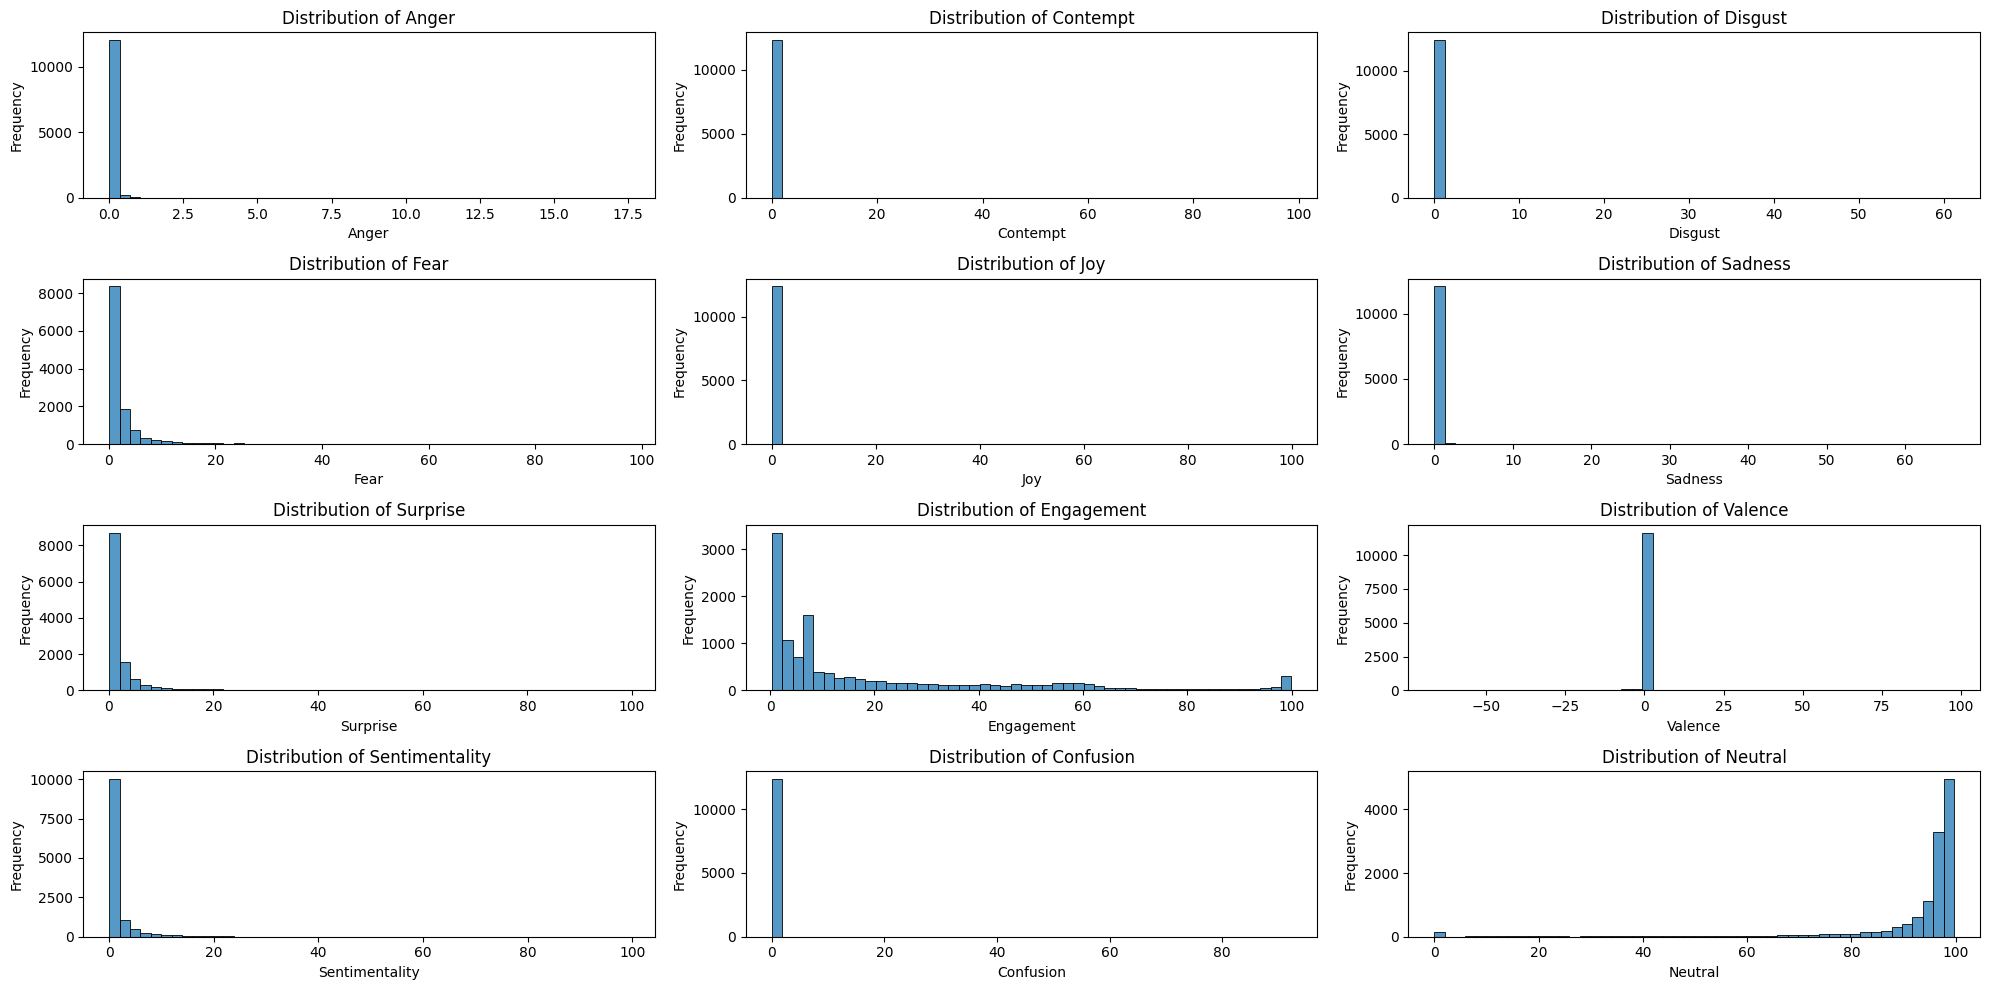

In [58]:
# 1. Plot Emotion Distributions
print("Generating emotion distributions...")
emotion_cols = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 
               'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral']

plt.figure(figsize=(20, 10))
for i, col in enumerate(emotion_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/emotion_distributions.png')
plt.show()

The observations indicate that most emotion distributions are **highly right-skewed with a strong peak at zero**, meaning **low-intensity emotional states are predominant** in the dataset. "Valence" shows a broader, more continuous distribution. This implies that strong emotional activations are rare compared to neutral or mild states in the recorded data.

Generating attention metrics...


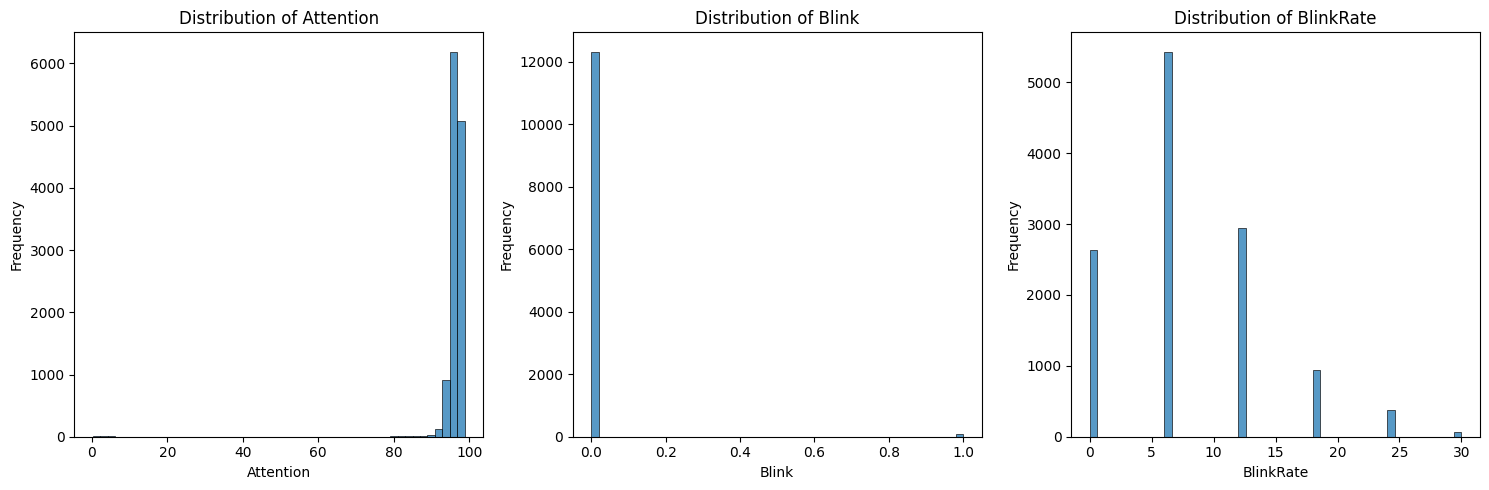

In [60]:
# 5. Plot Attention Metrics
print("Generating attention metrics...")
attention_cols = ['Attention', 'Blink', 'BlinkRate']

plt.figure(figsize=(15, 5))
for i, col in enumerate(attention_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/attention_metrics.png')
plt.show()

 * **Distribution of Attention**
* The vast majority of attention values cluster tightly between ~94 and 98.
* A small tail stretches down toward ~86.
* Interpretation:
The participant maintained high attention during most of the task.
Very few moments of low attention.

 * **Distribution of Blink**
* Almost all values are at 0 → meaning no blink at most time points.
* A few points at 1 → indicating actual blink events.
* Interpretation:
The participant blinked very rarely during the task (expected during focused work).

 * **Distribution of BlinkRate**
* Most of the blink rate values are low (0–10 blinks per time window).
* This suggests that, generally, the individuals or system being measured exhibit low to moderate blink rates, with high blink rates being relatively rare occurrences.
* Interpretation:
The participant generally had a low blink rate, with occasional bursts of blinking (could indicate cognitive fatigue, distraction, or momentary breaks).

* **Overall inference**
 This figure tells you:
* The participant showed consistent high attention.
* Blinked rarely, as expected during a demanding visual-cognitive task.
* Blink rate spikes might mark brief moments of cognitive load relief, fatigue, or disengagement.



## **IVT**

In [61]:
import pandas as pd
iv=pd.read_csv('36_IVT.csv')
iv.head()

UnixTime  Row QuestionKey                   Timestamp  Gaze X  Gaze Y  \
0  1.676547e+09    1         NaN  2023-02-16 17:07:50.031047     NaN     NaN   
1  1.676547e+09    2         NaN  2023-02-16 17:07:50.036206   947.0   572.0   
2  1.676547e+09    3         NaN  2023-02-16 17:07:50.044564   942.0   565.0   
3  1.676547e+09    4         NaN  2023-02-16 17:07:50.052885   941.0   544.5   
4  1.676547e+09    5         NaN  2023-02-16 17:07:50.061323   945.0   551.0   

   Interpolated Gaze X  Interpolated Gaze Y  Interpolated Distance  \
0                  NaN                  NaN                    NaN   
1           942.166667                574.5             626.164124   
2           943.333333                560.5             626.339539   
3           942.666667                553.5             626.384674   
4           945.333333                545.0             626.474030   

   Gaze Velocity  ...  Saccade Index  Saccade Index by Stimulus  \
0            NaN  ...            NaN                        NaN   
1      21.055381  ...            NaN                        NaN   
2      20.589372  ...            NaN                        NaN   
3      15.244014  ...            NaN                        NaN   
4       7.120482  ...            NaN                        NaN   

   Saccade Start  Saccade End  Saccade Duration  Saccade Amplitude  \
0            NaN          NaN               NaN                NaN   
1            NaN          NaN               NaN                NaN   
2            NaN          NaN               NaN                NaN   
3            NaN          NaN               NaN                NaN   
4            NaN          NaN               NaN                NaN   

   Saccade Peak Velocity  Saccade Peak Acceleration  \
0                    NaN                        NaN   
1                    NaN                        NaN   
2                    NaN                        NaN   
3                    NaN                        NaN   
4                    NaN                        NaN   

   Saccade Peak Deceleration  Saccade Direction  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 29 columns]

In [62]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
147503    False
147504    False
147505    False
147506    False
147507    False
Length: 147508, dtype: bool

In [63]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
147503    False
147504    False
147505    False
147506    False
147507    False
Length: 147508, dtype: bool

In [64]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
147503    False
147504    False
147505    False
147506    False
147507    False
Length: 147508, dtype: bool

In [65]:
iv.dtypes

UnixTime                      float64
Row                             int64
QuestionKey                    object
Timestamp                      object
Gaze X                        float64
Gaze Y                        float64
Interpolated Gaze X           float64
Interpolated Gaze Y           float64
Interpolated Distance         float64
Gaze Velocity                 float64
Gaze Acceleration             float64
Fixation Index                float64
Fixation Index by Stimulus    float64
Fixation X                    float64
Fixation Y                    float64
Fixation Start                float64
Fixation End                  float64
Fixation Duration             float64
Fixation Dispersion           float64
Saccade Index                 float64
Saccade Index by Stimulus     float64
Saccade Start                 float64
Saccade End                   float64
Saccade Duration              float64
Saccade Amplitude             float64
Saccade Peak Velocity         float64
Saccade Peak

In [66]:
iv['Timestamp'] = pd.to_datetime(iv['Timestamp'], errors='coerce')

In [67]:
# Identify columns with outliers using IQR
numeric_cols = iv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = iv[col].quantile(0.25)
    Q3 = iv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((iv[col] < lower) | (iv[col] > upper)).any():
        outlier_cols.append(col)

In [68]:

# Fill nulls: median for columns with outliers, mean for other numeric, mode for object
for col in iv.columns:
    if iv[col].isnull().any():
        if col in outlier_cols:
            iv[col] = iv[col].fillna(iv[col].median())
        elif iv[col].dtype in ['float64', 'int64']:
            iv[col] = iv[col].fillna(iv[col].mean())
        else:
            iv[col] = iv[col].fillna(iv[col].mode()[0])

In [69]:
iv.isnull().sum()

UnixTime                      0
Row                           0
QuestionKey                   0
Timestamp                     0
Gaze X                        0
Gaze Y                        0
Interpolated Gaze X           0
Interpolated Gaze Y           0
Interpolated Distance         0
Gaze Velocity                 0
Gaze Acceleration             0
Fixation Index                0
Fixation Index by Stimulus    0
Fixation X                    0
Fixation Y                    0
Fixation Start                0
Fixation End                  0
Fixation Duration             0
Fixation Dispersion           0
Saccade Index                 0
Saccade Index by Stimulus     0
Saccade Start                 0
Saccade End                   0
Saccade Duration              0
Saccade Amplitude             0
Saccade Peak Velocity         0
Saccade Peak Acceleration     0
Saccade Peak Deceleration     0
Saccade Direction             0
dtype: int64

In [70]:
iv_cr=iv.select_dtypes(include=['float64','int64'])
iv_corr=iv_cr.corr().round(2)
iv_corr

UnixTime   Row  Gaze X  Gaze Y  \
UnixTime                        1.00  1.00    0.00    0.07   
Row                             1.00  1.00    0.00    0.07   
Gaze X                          0.00  0.00    1.00    0.08   
Gaze Y                          0.07  0.07    0.08    1.00   
Interpolated Gaze X             0.00  0.00    1.00    0.08   
Interpolated Gaze Y             0.07  0.07    0.08    1.00   
Interpolated Distance           0.60  0.60   -0.11   -0.05   
Gaze Velocity                   0.03  0.03    0.00   -0.01   
Gaze Acceleration              -0.00 -0.00    0.00    0.01   
Fixation Index                  0.90  0.90    0.00    0.07   
Fixation Index by Stimulus      0.90  0.90    0.00    0.07   
Fixation X                      0.00  0.00    0.93    0.08   
Fixation Y                      0.07  0.07    0.08    0.92   
Fixation Start                  0.90  0.90    0.00    0.07   
Fixation End                    0.90  0.90    0.00    0.07   
Fixation Duration              -0.06 -0.06    0.05    0.05   
Fixation Dispersion            -0.04 -0.04    0.04   -0.02   
Saccade Index                   0.35  0.35    0.00    0.02   
Saccade Index by Stimulus       0.35  0.35    0.00    0.02   
Saccade Start                   0.35  0.35    0.00    0.02   
Saccade End                     0.35  0.35    0.00    0.02   
Saccade Duration                0.02  0.02    0.01   -0.01   
Saccade Amplitude               0.03  0.03    0.02   -0.02   
Saccade Peak Velocity           0.03  0.03    0.02   -0.01   
Saccade Peak Acceleration       0.03  0.03    0.02    0.00   
Saccade Peak Deceleration      -0.03 -0.03   -0.02    0.00   
Saccade Direction              -0.00 -0.00    0.01    0.00   

                            Interpolated Gaze X  Interpolated Gaze Y  \
UnixTime                                   0.00                 0.07   
Row                                        0.00                 0.07   
Gaze X                                     1.00                 0.08   
Gaze Y                                     0.08                 1.00   
Interpolated Gaze X                        1.00                 0.08   
Interpolated Gaze Y                        0.08                 1.00   
Interpolated Distance                     -0.11                -0.05   
Gaze Velocity                              0.00                -0.01   
Gaze Acceleration                          0.00                 0.01   
Fixation Index                             0.00                 0.07   
Fixation Index by Stimulus                 0.00                 0.07   
Fixation X                                 0.93                 0.08   
Fixation Y                                 0.08                 0.92   
Fixation Start                             0.00                 0.07   
Fixation End                               0.00                 0.07   
Fixation Duration                          0.05                 0.05   
Fixation Dispersion                        0.04                -0.02   
Saccade Index                              0.00                 0.02   
Saccade Index by Stimulus                  0.00                 0.02   
Saccade Start                              0.00                 0.02   
Saccade End                                0.00                 0.02   
Saccade Duration                           0.01                -0.01   
Saccade Amplitude                          0.02                -0.02   
Saccade Peak Velocity                      0.02                -0.01   
Saccade Peak Acceleration                  0.02                 0.00   
Saccade Peak Deceleration                 -0.02                 0.00   
Saccade Direction                          0.01                 0.00   

                            Interpolated Distance  Gaze Velocity  \
UnixTime                                     0.60           0.03   
Row                                          0.60           0.03   
Gaze X                                      -0.11           0.00   
Ga

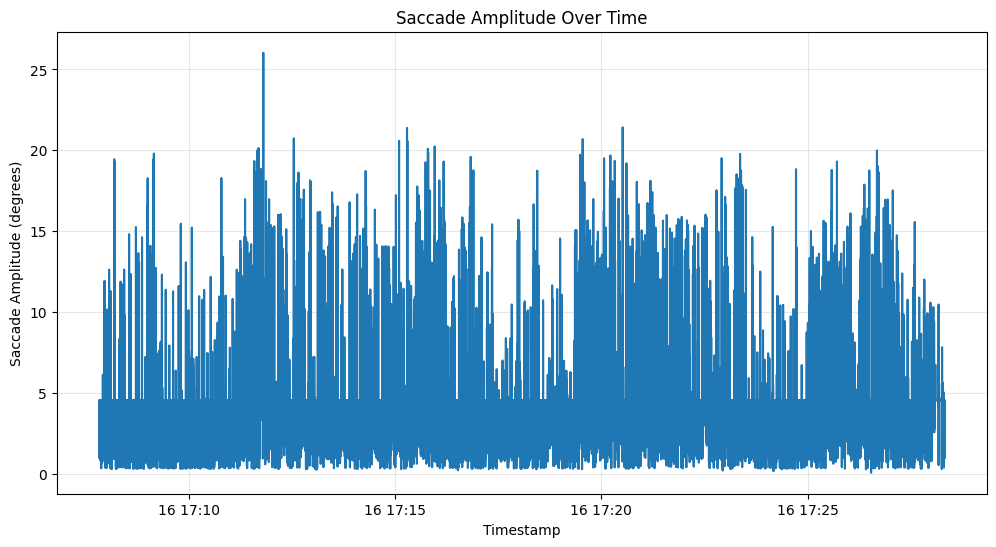

In [71]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Saccade Amplitude', data=iv)
plt.title('Saccade Amplitude Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Saccade Amplitude (degrees)')
plt.grid(alpha=0.3)
# plt.tight_layout()
plt.show()

* Periods of high saccade amplitude (peaks)
➡ These are moments where the participant’s eye made large movements — possibly scanning for targets, switching between stimuli, or being unsure where to look.

* Periods of low saccade amplitude (flat areas)
➡ These are times when eye movements were small → focused attention on one area or careful local inspection.

* Variation across time
➡ The plot shows fluctuations — alternating between searching/exploring (high saccades) and focusing (low saccades).
➡ Could reflect task difficulty, attention shifts, or changes in mental strategy.

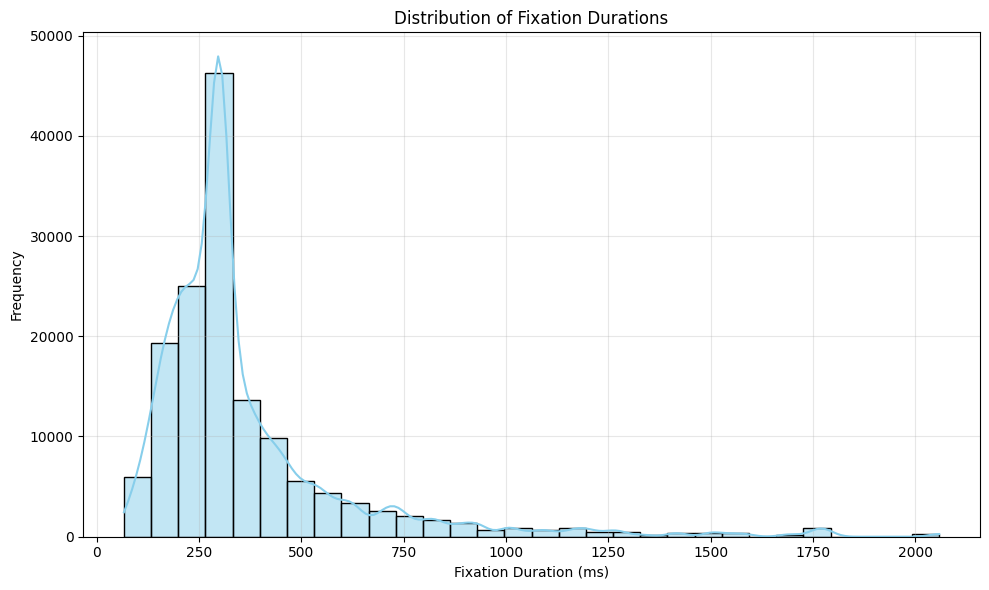

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(iv['Fixation Duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Fixation Durations')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* The distribution is highly skewed to the right (positively skewed).
* There's a very prominent peak (mode) for fixation durations somewhere between 250 ms and 500 ms, with the highest frequency around 200-300 ms.
* The frequency rapidly decreases as fixation durations increase.
* There's a long "tail" extending towards the right, indicating that while most fixations are relatively short, there are occasional much longer fixations, though these are far less frequent.

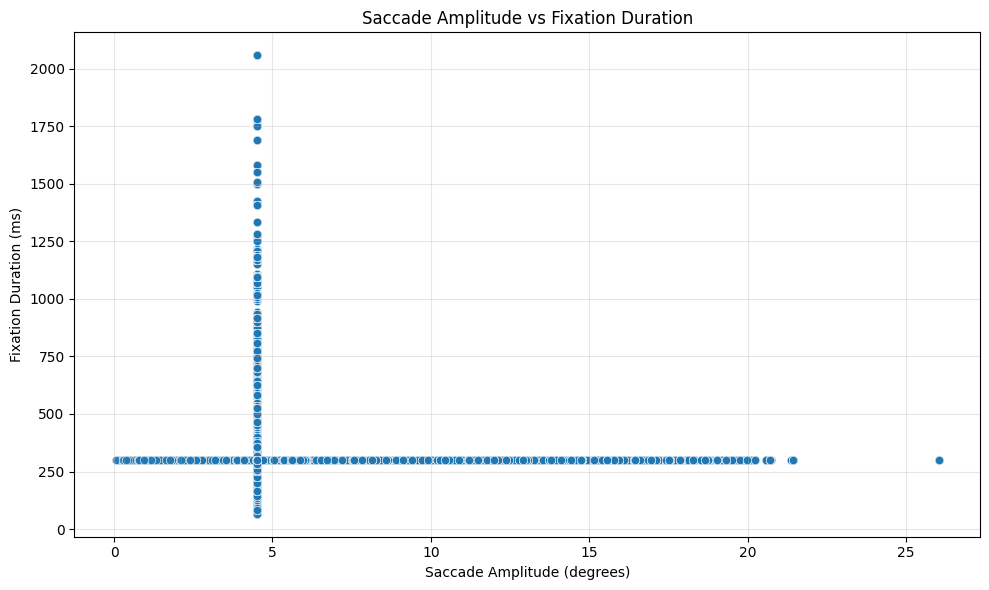

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Saccade Amplitude', y='Fixation Duration', data=iv, alpha=0.5)
plt.title('Saccade Amplitude vs Fixation Duration')
plt.xlabel('Saccade Amplitude (degrees)')
plt.ylabel('Fixation Duration (ms)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Eye-tracking data showed dynamic shifts between exploratory and focused viewing, as seen in the variation of saccade amplitude over time.

Participants demonstrated a mix of short and long fixations, indicating phases of fast scanning and deep analysis.

Gaze patterns revealed that certain areas of the task space received repeated attention, possibly linked to key task elements.

The combination of saccade size and fixation time can give clues about whether participants are searching or processing.

## **EYE**

In [74]:
ey=pd.read_csv('36_EYE.csv') 
ey.head()

UnixTime  Row QuestionKey                   Timestamp  ET_GazeLeftx  \
0  1.676547e+09    1         NaN  2023-02-16 17:07:50.031047           NaN   
1  1.676547e+09    2         NaN  2023-02-16 17:07:50.036206         958.0   
2  1.676547e+09    3         NaN  2023-02-16 17:07:50.044564         957.0   
3  1.676547e+09    4         NaN  2023-02-16 17:07:50.052885         953.0   
4  1.676547e+09    5         NaN  2023-02-16 17:07:50.061323         961.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0           NaN            NaN            NaN           NaN            NaN   
1         595.0          936.0          549.0     -1.000000      -1.000000   
2         582.0          927.0          548.0      2.820633       2.482498   
3         555.0          929.0          534.0     -1.000000      -1.000000   
4         575.0          929.0          527.0     -1.000000      -1.000000   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0            NaN              NaN               NaN             NaN   
1         41.729       627.259949        625.068298        0.560408   
2         50.088       627.593384        625.085693        0.560267   
3         58.407       627.746643        625.022705        0.560119   
4         66.847       627.891541        625.056519        0.560185   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0             NaN              NaN              NaN              NaN   
1        0.441367         0.412745         0.446299              0.0   
2        0.441357         0.412614         0.446289              0.0   
3        0.441379         0.412510         0.446322              0.0   
4        0.441338         0.412528         0.446369              0.0   

   ET_ValidityRight  
0               NaN  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [75]:
ey.isnull().sum()

UnixTime                0
Row                     0
QuestionKey         64300
Timestamp               0
ET_GazeLeftx            4
ET_GazeLefty            4
ET_GazeRightx           4
ET_GazeRighty           4
ET_PupilLeft            4
ET_PupilRight           4
ET_TimeSignal           4
ET_DistanceLeft         4
ET_DistanceRight        4
ET_CameraLeftX          4
ET_CameraLeftY          4
ET_CameraRightX         4
ET_CameraRightY         4
ET_ValidityLeft         4
ET_ValidityRight        4
dtype: int64

In [76]:
ey.shape

(147508, 19)

In [77]:
ey_cr=ey.select_dtypes(include=['float64','int64'])
ey_corr=ey_cr.corr().round(2)
ey_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00         -0.01          0.06          -0.01   
Row                   1.00  1.00         -0.01          0.06          -0.01   
ET_GazeLeftx         -0.01 -0.01          1.00          0.27           0.93   
ET_GazeLefty          0.06  0.06          0.27          1.00           0.21   
ET_GazeRightx        -0.01 -0.01          0.93          0.21           1.00   
ET_GazeRighty         0.05  0.05          0.20          0.90           0.28   
ET_PupilLeft          0.01  0.01          0.06          0.08           0.04   
ET_PupilRight         0.01  0.01          0.03          0.05           0.06   
ET_TimeSignal         1.00  1.00         -0.01          0.06          -0.01   
ET_DistanceLeft       0.06  0.06          0.41          0.47           0.28   
ET_DistanceRight      0.03  0.03          0.26          0.31           0.41   
ET_CameraLeftX       -0.03 -0.03          0.41          0.48           0.28   
ET_CameraLeftY        0.04  0.04          0.42          0.49           0.29   
ET_CameraRightX      -0.05 -0.05          0.26          0.32           0.41   
ET_CameraRightY       0.00  0.00          0.28          0.33           0.43   
ET_ValidityLeft       0.02  0.02         -0.42         -0.48          -0.29   
ET_ValidityRight      0.04  0.04         -0.28         -0.32          -0.43   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                   0.05          0.01           0.01           1.00   
Row                        0.05          0.01           0.01           1.00   
ET_GazeLeftx               0.20          0.06           0.03          -0.01   
ET_GazeLefty               0.90          0.08           0.05           0.06   
ET_GazeRightx              0.28          0.04           0.06          -0.01   
ET_GazeRighty              1.00          0.05           0.08           0.05   
ET_PupilLeft               0.05          1.00           0.97           0.01   
ET_PupilRight              0.08          0.97           1.00           0.01   
ET_TimeSignal              0.05          0.01           0.01           1.00   
ET_DistanceLeft            0.32          0.15           0.08           0.06   
ET_DistanceRight           0.48          0.10           0.15           0.03   
ET_CameraLeftX             0.33          0.15           0.08          -0.03   
ET_CameraLeftY             0.34          0.15           0.08           0.04   
ET_CameraRightX            0.49          0.09           0.15          -0.05   
ET_CameraRightY            0.50          0.10           0.15           0.00   
ET_ValidityLeft           -0.33         -0.15          -0.08           0.02   
ET_ValidityRight          -0.49         -0.09          -0.15           0.04   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                     0.06              0.03           -0.03   
Row                          0.06              0.03           -0.03   
ET_GazeLeftx                 0.41              0.26            0.41   
ET_GazeLefty                 0.47              0.31            0.48   
ET_GazeRightx                0.28              0.41            0.28   
ET_GazeRighty                0.32              0.48            0.33   
ET_PupilLeft                 0.15              0.10            0.15   
ET_PupilRight                0.08              0.15            0.08   
ET_TimeSignal                0.06              0.03           -0.03   
ET_DistanceLeft              1.00              0.66            0.99   
ET_DistanceRight             0.66              1.00            0.65   
ET_CameraLeftX               0.99              0.65            1.00   
ET_CameraLeftY               1.00              0.65            1.00   
ET_CameraRightX              0.65              0.99            0.65   
ET_CameraRightY              0.65              1.00            0.65   
ET_ValidityLeft             -0.99   

In [78]:
ey.dtypes

UnixTime            float64
Row                   int64
QuestionKey          object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [79]:

ey['Timestamp'] = pd.to_datetime(ey['Timestamp'],errors='coerce')


In [80]:
# Identify columns with outliers using IQR
numeric_cols = ey.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = ey[col].quantile(0.25)
    Q3 = ey[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((ey[col] < lower) | (ey[col] > upper)).any():
        outlier_cols.append(col)

In [81]:
for col in ey.columns:
    if ey[col].isnull().any():
        if col in outlier_cols:
            ey[col] = ey[col].fillna(ey[col].median())
        elif ey[col].dtype in ['float64', 'int64']:
            ey[col] = ey[col].fillna(ey[col].mean())
        else:
            ey[col] = ey[col].fillna(ey[col].mode()[0])

In [82]:
ey.isnull().sum()

UnixTime            0
Row                 0
QuestionKey         0
Timestamp           0
ET_GazeLeftx        0
ET_GazeLefty        0
ET_GazeRightx       0
ET_GazeRighty       0
ET_PupilLeft        0
ET_PupilRight       0
ET_TimeSignal       0
ET_DistanceLeft     0
ET_DistanceRight    0
ET_CameraLeftX      0
ET_CameraLeftY      0
ET_CameraRightX     0
ET_CameraRightY     0
ET_ValidityLeft     0
ET_ValidityRight    0
dtype: int64

In [83]:
ey.dtypes

UnixTime                   float64
Row                          int64
QuestionKey                 object
Timestamp           datetime64[ns]
ET_GazeLeftx               float64
ET_GazeLefty               float64
ET_GazeRightx              float64
ET_GazeRighty              float64
ET_PupilLeft               float64
ET_PupilRight              float64
ET_TimeSignal              float64
ET_DistanceLeft            float64
ET_DistanceRight           float64
ET_CameraLeftX             float64
ET_CameraLeftY             float64
ET_CameraRightX            float64
ET_CameraRightY            float64
ET_ValidityLeft            float64
ET_ValidityRight           float64
dtype: object

In [84]:
ey.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'ET_GazeLeftx',
 'ET_GazeLefty',
 'ET_GazeRightx',
 'ET_GazeRighty',
 'ET_PupilLeft',
 'ET_PupilRight',
 'ET_TimeSignal',
 'ET_DistanceLeft',
 'ET_DistanceRight',
 'ET_CameraLeftX',
 'ET_CameraLeftY',
 'ET_CameraRightX',
 'ET_CameraRightY',
 'ET_ValidityLeft',
 'ET_ValidityRight']

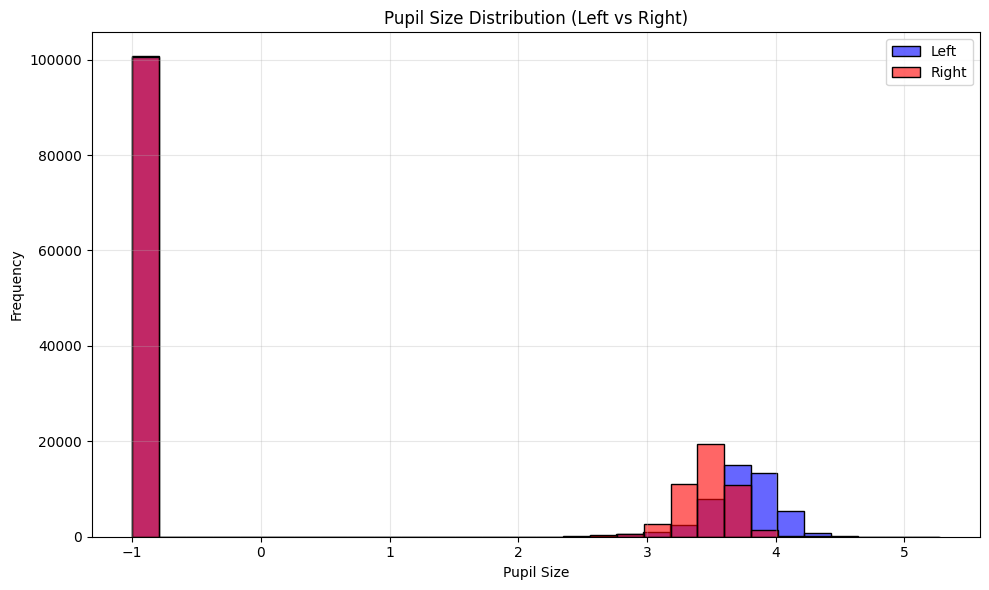

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(ey['ET_PupilLeft'], bins=30, color='blue', label='Left', alpha=0.6)
sns.histplot(ey['ET_PupilRight'], bins=30, color='red', label='Right', alpha=0.6)
plt.title('Pupil Size Distribution (Left vs Right)')
plt.xlabel('Pupil Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Similar distributions → consistent tracking + lighting.
- Bigger pupil sizes → possibly higher cognitive effort or arousal.


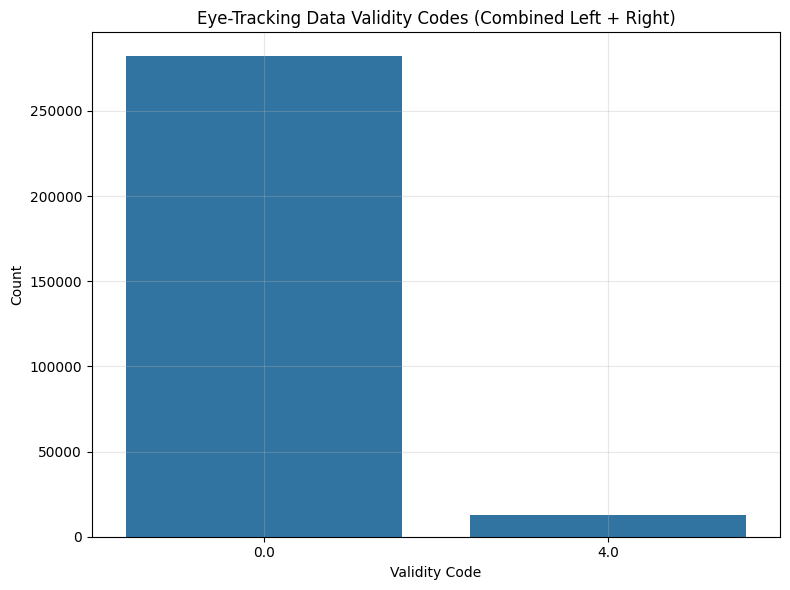

In [86]:
validity = pd.concat([
    ey['ET_ValidityLeft'].rename('Validity').to_frame(),
    ey['ET_ValidityRight'].rename('Validity').to_frame()
])

plt.figure(figsize=(8, 6))
sns.countplot(x='Validity', data=validity)
plt.title('Eye-Tracking Data Validity Codes (Combined Left + Right)')
plt.xlabel('Validity Code')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




0 = good validity

Higher numbers = reduced data quality

Inference
-Mostly 0s → clean data
-Many 4→ noise, may need filtering

In [87]:
# Clean keys to match
ey['CleanKey'] = ey['QuestionKey'].astype(str).str.replace(r'^\d+', '', regex=True).str.strip().str.lower()
psy['QuestionNumber'] = psy['QuestionNumber'].astype(str).str.strip().str.lower()

# Define strategy in PSY
RT_THRESHOLD = 5
psy['Strategy'] = psy['ResponseTime'].apply(lambda x: 'Holistic' if x < RT_THRESHOLD else 'Piecemeal')

# Merge
ey = ey.merge(
    psy[['QuestionNumber', 'ResponseTime', 'Strategy']],
    left_on='CleanKey',
    right_on='QuestionNumber',
    how='left'
)

# Check merge worked
print(ey[['CleanKey', 'ResponseTime', 'Strategy']].head())


  CleanKey  ResponseTime   Strategy
0    item7         59.12  Piecemeal
1    item7         27.17  Piecemeal
2    item7         20.30  Piecemeal
3    item7         59.12  Piecemeal
4    item7         27.17  Piecemeal


C:\Users\Hp\AppData\Local\Temp\ipykernel_12336\1595222774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')


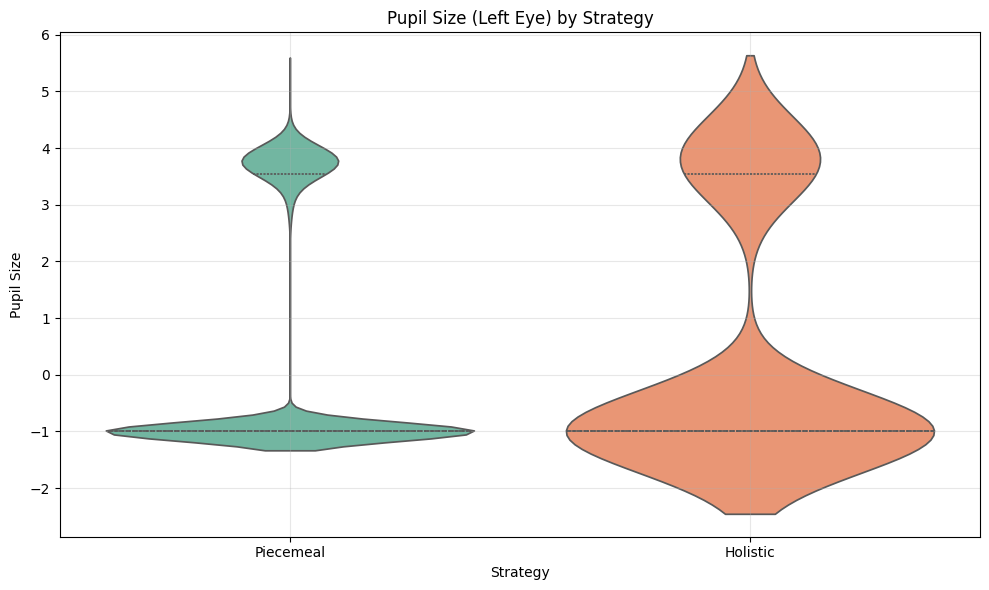

In [88]:


plt.figure(figsize=(10, 6))
sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')
plt.title('Pupil Size (Left Eye) by Strategy')
plt.xlabel('Strategy')
plt.ylabel('Pupil Size')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* Data Representation for "Piecemeal" Strategy (Left Violin, Green):
* The violin is relatively narrow, indicating a smaller spread of data.
* It's centered around a negative pupil size value (around -1).
* There's also a smaller, distinct cluster of data with a higher pupil size (around 3-4).
* The presence of two distinct bulges suggests a bimodal distribution or two different groups of pupil sizes under the "Piecemeal" strategy.
* Data Representation for "Holistic" Strategy (Right Violin, Orange):
* This violin is much wider, indicating a larger spread of data.
* It also appears to be centered around a negative pupil size value (around -1 to 0), similar to "Piecemeal," but with a much wider distribution at that lower range.
* There's a significant upper tail or second peak extending to higher positive pupil size values (up to around 5.5).
* It appears to be bimodal or at least heavily skewed, with a large concentration around negative/low values and another broader concentration at higher values.

## **BlankScreenData**

In [89]:
bd=pd.read_csv('36_BlankScreenData.csv')
bd.head()

UnixTime    Row       Segment                   Timestamp  \
0  1.676548e+09  21731  BlankScreen1  2023-02-16 17:10:51.069495   
1  1.676548e+09  21732  BlankScreen1  2023-02-16 17:10:51.077828   
2  1.676548e+09  21733  BlankScreen1  2023-02-16 17:10:51.086123   
3  1.676548e+09  21734  BlankScreen1  2023-02-16 17:10:51.094557   
4  1.676548e+09  21735  BlankScreen1  2023-02-16 17:10:51.102802   

   ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  \
0          -1.0          -1.0           -1.0           -1.0          -1.0   
1          -1.0          -1.0           -1.0           -1.0          -1.0   
2          -1.0          -1.0           -1.0           -1.0          -1.0   
3          -1.0          -1.0           -1.0           -1.0          -1.0   
4         912.0         275.0           -1.0           -1.0          -1.0   

   ET_PupilRight  ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  \
0           -1.0     181075.019        -1.000000              -1.0   
1           -1.0     181083.351        -1.000000              -1.0   
2           -1.0     181091.646        -1.000000              -1.0   
3           -1.0     181100.081        -1.000000              -1.0   
4           -1.0     181108.325       600.683899              -1.0   

   ET_CameraLeftX  ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  \
0       -1.000000       -1.000000             -1.0             -1.0   
1       -1.000000       -1.000000             -1.0             -1.0   
2       -1.000000       -1.000000             -1.0             -1.0   
3       -1.000000       -1.000000             -1.0             -1.0   
4        0.562433        0.417348             -1.0             -1.0   

   ET_ValidityLeft  ET_ValidityRight  
0              4.0               4.0  
1              4.0               4.0  
2              4.0               4.0  
3              4.0               4.0  
4              0.0               4.0

In [90]:
bd.dtypes

UnixTime            float64
Row                   int64
Segment              object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [91]:
bd['Timestamp'] = pd.to_datetime(bd['Timestamp'], errors='coerce')

In [92]:
bd.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5395    False
5396    False
5397    False
5398    False
5399    False
Length: 5400, dtype: bool

In [93]:
bd.isnull().sum()

UnixTime            0
Row                 0
Segment             0
Timestamp           0
ET_GazeLeftx        0
ET_GazeLefty        0
ET_GazeRightx       0
ET_GazeRighty       0
ET_PupilLeft        0
ET_PupilRight       0
ET_TimeSignal       0
ET_DistanceLeft     0
ET_DistanceRight    0
ET_CameraLeftX      0
ET_CameraLeftY      0
ET_CameraRightX     0
ET_CameraRightY     0
ET_ValidityLeft     0
ET_ValidityRight    0
dtype: int64

In [94]:
# Identify columns with outliers using IQR
numeric_cols = bd.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = bd[col].quantile(0.25)
    Q3 = bd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((bd[col] < lower) | (bd[col] > upper)).any():
        print(outlier_cols.append(col))

None
None
None
None
None
None
None
None
None
None
None
None


In [95]:
bd_cr=bd.select_dtypes(include=['float64','int64'])
bd_corr=bd_cr.corr().round(2)
bd_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00         -0.18         -0.07          -0.19   
Row                   1.00  1.00         -0.18         -0.07          -0.19   
ET_GazeLeftx         -0.18 -0.18          1.00          0.70           0.77   
ET_GazeLefty         -0.07 -0.07          0.70          1.00           0.49   
ET_GazeRightx        -0.19 -0.19          0.77          0.49           1.00   
ET_GazeRighty        -0.09 -0.09          0.43          0.62           0.77   
ET_PupilLeft         -0.01 -0.01          0.12          0.16           0.09   
ET_PupilRight        -0.02 -0.02          0.09          0.12           0.17   
ET_TimeSignal         1.00  1.00         -0.18         -0.07          -0.19   
ET_DistanceLeft       0.02  0.02          0.69          0.95           0.49   
ET_DistanceRight     -0.04 -0.04          0.43          0.58           0.79   
ET_CameraLeftX       -0.07 -0.07          0.71          0.95           0.50   
ET_CameraLeftY       -0.02 -0.02          0.70          0.95           0.50   
ET_CameraRightX      -0.11 -0.11          0.44          0.58           0.80   
ET_CameraRightY      -0.08 -0.08          0.44          0.58           0.80   
ET_ValidityLeft       0.07  0.07         -0.71         -0.95          -0.51   
ET_ValidityRight      0.11  0.11         -0.44         -0.58          -0.80   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                  -0.09         -0.01          -0.02           1.00   
Row                       -0.09         -0.01          -0.02           1.00   
ET_GazeLeftx               0.43          0.12           0.09          -0.18   
ET_GazeLefty               0.62          0.16           0.12          -0.07   
ET_GazeRightx              0.77          0.09           0.17          -0.19   
ET_GazeRighty              1.00          0.11           0.21          -0.09   
ET_PupilLeft               0.11          1.00           0.96          -0.01   
ET_PupilRight              0.21          0.96           1.00          -0.02   
ET_TimeSignal             -0.09         -0.01          -0.02           1.00   
ET_DistanceLeft            0.60          0.16           0.12           0.02   
ET_DistanceRight           0.97          0.11           0.21          -0.04   
ET_CameraLeftX             0.61          0.16           0.13          -0.07   
ET_CameraLeftY             0.61          0.16           0.13          -0.02   
ET_CameraRightX            0.97          0.11           0.21          -0.11   
ET_CameraRightY            0.97          0.11           0.21          -0.08   
ET_ValidityLeft           -0.61         -0.16          -0.13           0.07   
ET_ValidityRight          -0.97         -0.11          -0.21           0.11   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                     0.02             -0.04           -0.07   
Row                          0.02             -0.04           -0.07   
ET_GazeLeftx                 0.69              0.43            0.71   
ET_GazeLefty                 0.95              0.58            0.95   
ET_GazeRightx                0.49              0.79            0.50   
ET_GazeRighty                0.60              0.97            0.61   
ET_PupilLeft                 0.16              0.11            0.16   
ET_PupilRight                0.12              0.21            0.13   
ET_TimeSignal                0.02             -0.04           -0.07   
ET_DistanceLeft              1.00              0.62            0.99   
ET_DistanceRight             0.62              1.00            0.62   
ET_CameraLeftX               0.99              0.62            1.00   
ET_CameraLeftY               1.00              0.62            1.00   
ET_CameraRightX              0.62              1.00            0.63   
ET_CameraRightY              0.62              1.00            0.62   
ET_ValidityLeft             -0.99   

In [96]:
bd.head()

UnixTime    Row       Segment                  Timestamp  ET_GazeLeftx  \
0  1.676548e+09  21731  BlankScreen1 2023-02-16 17:10:51.069495          -1.0   
1  1.676548e+09  21732  BlankScreen1 2023-02-16 17:10:51.077828          -1.0   
2  1.676548e+09  21733  BlankScreen1 2023-02-16 17:10:51.086123          -1.0   
3  1.676548e+09  21734  BlankScreen1 2023-02-16 17:10:51.094557          -1.0   
4  1.676548e+09  21735  BlankScreen1 2023-02-16 17:10:51.102802         912.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0          -1.0           -1.0           -1.0          -1.0           -1.0   
1          -1.0           -1.0           -1.0          -1.0           -1.0   
2          -1.0           -1.0           -1.0          -1.0           -1.0   
3          -1.0           -1.0           -1.0          -1.0           -1.0   
4         275.0           -1.0           -1.0          -1.0           -1.0   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0     181075.019        -1.000000              -1.0       -1.000000   
1     181083.351        -1.000000              -1.0       -1.000000   
2     181091.646        -1.000000              -1.0       -1.000000   
3     181100.081        -1.000000              -1.0       -1.000000   
4     181108.325       600.683899              -1.0        0.562433   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0       -1.000000             -1.0             -1.0              4.0   
1       -1.000000             -1.0             -1.0              4.0   
2       -1.000000             -1.0             -1.0              4.0   
3       -1.000000             -1.0             -1.0              4.0   
4        0.417348             -1.0             -1.0              0.0   

   ET_ValidityRight  
0               4.0  
1               4.0  
2               4.0  
3               4.0  
4               4.0

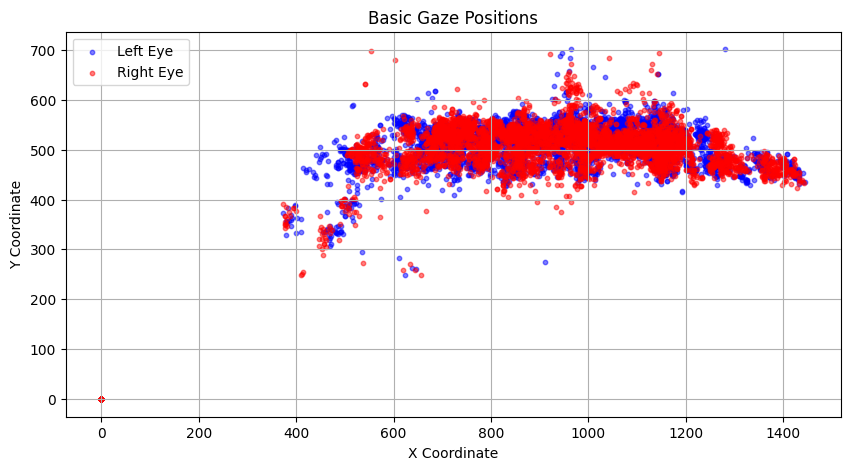

In [97]:
plt.figure(figsize=(10, 5))

# Left eye
plt.scatter(bd['ET_GazeLeftx'], bd['ET_GazeLefty'], 
            alpha=0.5, s=10, label='Left Eye', color='blue')

# Right eye
plt.scatter(bd['ET_GazeRightx'], bd['ET_GazeRighty'], 
            alpha=0.5, s=10, label='Right Eye', color='red')

plt.title('Basic Gaze Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

- Fixation clusters: Dense point clouds show where the eyes lingered (even on a blank screen, this may reveal default gaze patterns)
- Tracking alignment: If red/blue dots overlap well → good binocular tracking. If separated → possible calibration issues
- Data coverage: Gaps indicate missing data (e.g., during blinks)